In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
temperatures = pd.read_csv('data/Mean Temperatures.csv')
humidities = pd.read_csv('data/Mean Humidity.csv')

In [3]:
temperatures

,_time,Mean (DS18B20),Mean (SDC40),Mean (AHT20),Mean (BMP280),Mean (Others)
0,2025-09-04 12:10:00,25.8,30.3,31.0,34.8,26.5
1,2025-09-04 12:20:00,26.0,30.8,31.8,36.5,26.9
2,2025-09-04 12:30:00,26.0,30.4,32.1,35.5,27.1
3,2025-09-04 12:40:00,26.2,30.6,31.3,35.8,27.0
4,2025-09-04 12:50:00,25.9,30.5,30.6,34.9,26.9
...,...,...,...,...,...,...
1867,2025-09-17 11:20:00,22.3,26.9,27.5,32.5,23.4
1868,2025-09-17 11:30:00,22.2,26.9,27.5,32.4,23.4
1869,2025-09-17 11:40:00,22.2,28.1,27.5,32.3,23.4
1870,2025-09-17 11:50:00,22.3,28.0,27.9,32.6,23.5


In [4]:
humidities

,_time,Mean (AHT20),Mean (SDC40),Mean (Other sensors)
0,2025-09-04 12:10:00,36.4,36.2,44.4
1,2025-09-04 12:20:00,34.6,35.3,44.1
2,2025-09-04 12:30:00,34.5,36.0,43.7
3,2025-09-04 12:40:00,35.3,35.5,43.4
4,2025-09-04 12:50:00,36.2,34.7,43.3
...,...,...,...,...
1867,2025-09-17 11:20:00,35.2,35.1,43.5
1868,2025-09-17 11:30:00,35.4,35.0,43.5
1869,2025-09-17 11:40:00,35.5,33.1,43.4
1870,2025-09-17 11:50:00,34.6,33.1,43.4


In [5]:
taht=temperatures['Mean (AHT20)'].to_numpy()
haht=humidities['Mean (AHT20)'].to_numpy()
tsdc=temperatures['Mean (SDC40)'].to_numpy()
hsdc=humidities['Mean (SDC40)'].to_numpy()
tother=temperatures['Mean (Others)'].to_numpy()
hother=humidities['Mean (Other sensors)'].to_numpy()

In [6]:
#source : https://www.omnicalculator.com/physics/absolute-humidity
def sat_vapor(T):
    Pc = 22.064e6 #Pa - critical pressure for water
    Tc = 647.096 #K - critical temperature for water
    a = [-7.85951783,1.84408259,-11.7866497,22.6807411,-15.9618719,1.80122502] #Empirical constants
    
    to = 1 - T/Tc
    Ps = Pc*np.exp(Tc/T*(a[0]*to+a[1]*np.power(to,1.5)+a[2]*np.power(to,3)+a[3]*np.power(to,3.5)+a[4]*np.power(to,4)+a[5]*np.power(to,7.5)))
    return Ps
                   

In [7]:
def abs_hum(T,RH):
    Rw = 461.5 #J/(kg.K) - Specific gas constant for water vapor
    AH = RH*sat_vapor(T)/(Rw*T*100)
    return AH

In [8]:
ahaht=abs_hum(taht+273.15,haht)
ahsdc=abs_hum(tsdc+273.15,hsdc)
ahother=abs_hum(tother+273.15,hother)

Text(0, 0.5, 'Absolute Humidity (g/m³)')

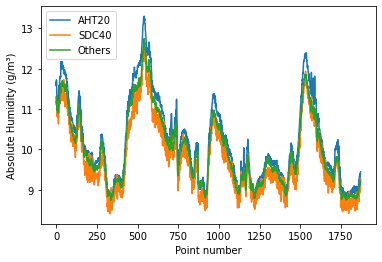

In [9]:
plt.plot(1000*ahaht)
plt.plot(1000*ahsdc)
plt.plot(1000*ahother)
plt.legend(['AHT20','SDC40','Others'])
plt.xlabel('Point number')
plt.ylabel('Absolute Humidity (g/m³)')

Text(0, 0.5, 'Absolute Humiditiy Difference (g/m³)')

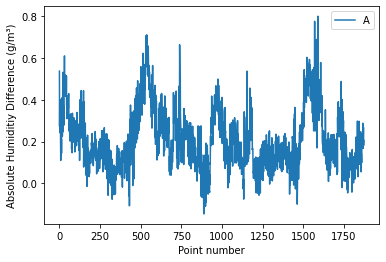

In [10]:
plt.plot(1000*(ahaht-ahother))
plt.legend('AHT20-Others')
plt.xlabel('Point number')
plt.ylabel('Absolute Humiditiy Difference (g/m³)')

Text(0, 0.5, 'Absolute Humiditiy Difference (g/m³)')

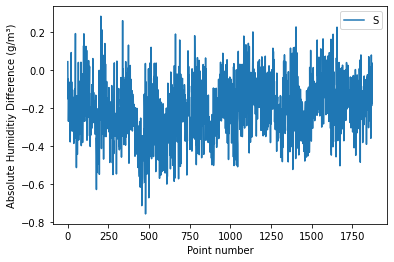

In [11]:
plt.plot(1000*(ahsdc-ahother))
plt.legend('SDC40-Others')
plt.xlabel('Point number')
plt.ylabel('Absolute Humiditiy Difference (g/m³)')

In [13]:
print('Mean difference AHT20-Others=', 1000*np.mean(ahaht-ahother),'g/m³')

Mean difference AHT20-Others= 0.2127191623338117 g/m³


In [14]:
print('Mean difference SDC40-Others=', 1000*np.mean(ahsdc-ahother),'g/m³')

Mean difference SDC40-Others= -0.20215301733470104 g/m³
